## クラウド設定

一度だけ実行すれば良い.

In [ ]:
from pathlib import Path

config = """[default]
url=https://api.qiqb-cloud.jp
api_token=xxxxxxx
"""
Path("~/.oqtopus").expanduser().write_text(config)
print("Configuration saved.")

Configuration saved.


QIQBクラウドのリンク：https://www.qiqb-cloud.jp/  
  
「ジョブ」のタブで, 実行済み・実行中のジョブを確認することができる. 

## ジョブの実行

以下の`PROGRAM = `に実行したい.pyファイル名を記入する.  
実行がなかなか終わらない場合はカーネル再起動が必要かもしれない.  
`payloads`に測定結果が返ってくる.  

In [1]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from oqtopus_sse_pulse.adapter import QuriAdapter, collect_payloads_from_job, collect_session_from_job
from oqtopus_sse_pulse.plotters import plot_payload

In [2]:
# ジョブの実行

DEVICE = "anemone"
PROGRAM = "check_waveform" # 読み出しパルスの反射波形を確認するプログラム

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e8690-5403-7e19-8000-4d090a0ffb8a
job_status = succeeded  elapsed=14.942
sample: [{'mode': 'avg', 'data': {'Q08': {'raw': {'I': [0.00041202380089089274, 1.3099717762088403e-05, 0.001470124931074679, 0.0008632380631752312, -4.4900654756929725e-05, 0.0007509778952226043, 0.0015782375121489167, 0.0006589200347661972, 0.0014289269456639886, 0.0005687408847734332, -0.001012077322229743, -0.0012841209536418319, 0.00016456368030048907, 0.0010896268067881465, 0.0005312120192684233, 0.0010333606041967869, 0.0005201218882575631, 0.0010509650455787778, 0.004858365748077631, 0.0049829003401100636, -0.005152418743818998, -0.023206818848848343, -0.03755202516913414, -0.04254018887877464, -0.04172167181968689, -0.03922508284449577, -0.03695135936141014, -0.036577776074409485, -0.0332958921790123, -0.029535137116909027, -0.025409165769815445, -0.021808169782161713, -0.02213785983622074, -0.02159811742603779, -0.019166992977261543, -0.01861385814845562, -0.0177138764411211, -0.0165080893784

In [3]:
# 測定結果
payloads

[{'mode': 'avg',
  'data': {'Q08': {'raw': {'I': [0.00041202380089089274,
      1.3099717762088403e-05,
      0.001470124931074679,
      0.0008632380631752312,
      -4.4900654756929725e-05,
      0.0007509778952226043,
      0.0015782375121489167,
      0.0006589200347661972,
      0.0014289269456639886,
      0.0005687408847734332,
      -0.001012077322229743,
      -0.0012841209536418319,
      0.00016456368030048907,
      0.0010896268067881465,
      0.0005312120192684233,
      0.0010333606041967869,
      0.0005201218882575631,
      0.0010509650455787778,
      0.004858365748077631,
      0.0049829003401100636,
      -0.005152418743818998,
      -0.023206818848848343,
      -0.03755202516913414,
      -0.04254018887877464,
      -0.04172167181968689,
      -0.03922508284449577,
      -0.03695135936141014,
      -0.036577776074409485,
      -0.0332958921790123,
      -0.029535137116909027,
      -0.025409165769815445,
      -0.021808169782161713,
      -0.02213785983622074,
   

測定結果のグラフ表示は, `plot_payload`関数を用いるか, `payloads`から値を直接取り出してプロットする.  

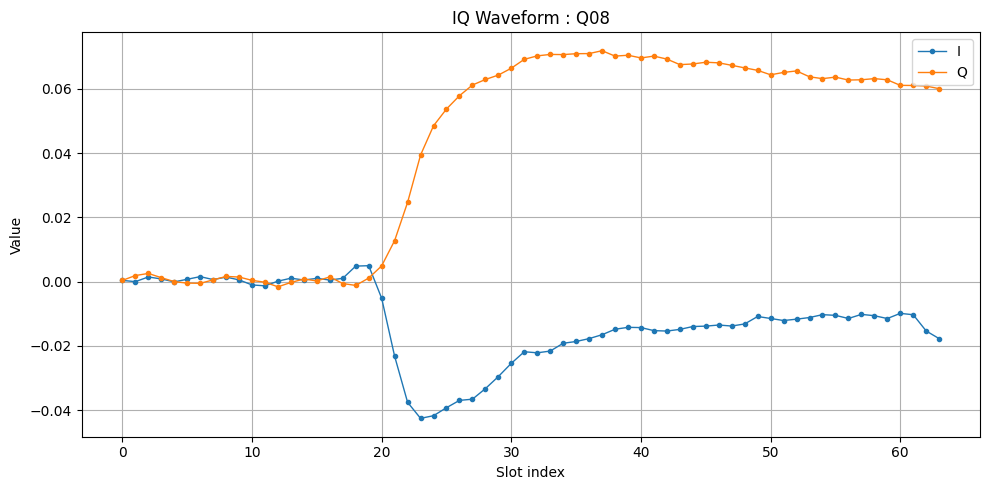

In [4]:
# グラフ描画

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)

In [6]:
# より詳細な情報を確認することもできます。
session = collect_session_from_job(
	backend=adapter,
	job_id=job.job_id,
)
session

{'log_file': PosixPath('extracted/ssecontainer.log'),
 'text': 'Python 3.11.9 (main, Sep  4 2024, 23:15:21) [GCC 12.2.0] on linux\nType "help", "copyright", "credits" or "license" for more information.\n>>> start program\n========================================\ndate: 2025-10-10 02:01:52\npython: 3.11.9\nqubex: 1.4.1b1+6937eef\nenv: /app/.venv\nconfig: /home/shared/qubex-config/64Qv2/config\nparams: /home/shared/qubex-config/64Qv2/params\nchip: 64Qv2 (AIST 8th #3 (1,1))\nqubits: [\'Q08\', \'Q09\', \'Q10\', \'Q11\']\nmuxes: [\'MUX02\']\nboxes: [\'S159A\']\n========================================\nSuccessfully connected.\npayload={\'mode\': \'avg\', \'data\': {\'Q08\': {\'raw\': {\'I\': [0.00041202380089089274, 1.3099717762088403e-05, 0.001470124931074679, 0.0008632380631752312, -4.4900654756929725e-05, 0.0007509778952226043, 0.0015782375121489167, 0.0006589200347661972, 0.0014289269456639886, 0.0005687408847734332, -0.001012077322229743, -0.0012841209536418319, 0.00016456368030048907,

job_id = 068e84aa-d8f9-7faf-8000-b74708a0ccaa
job_status = succeeded  elapsed=27.368


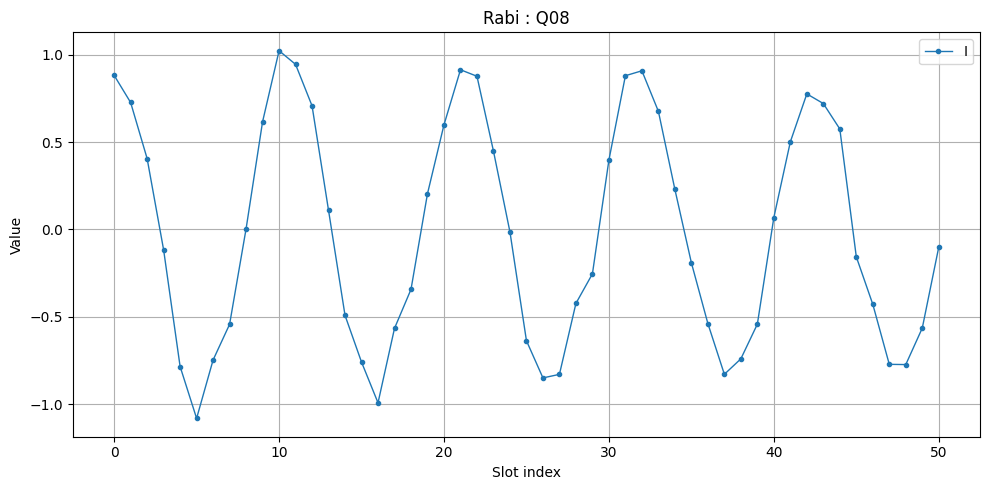

In [ ]:
# ラビ振動測定

DEVICE = "anemone"
PROGRAM = "check_rabi"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

# グラフ描画
p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)


job_id = 068e84b8-bb28-773a-8000-812a42da2761
job_status = succeeded  elapsed=49.873


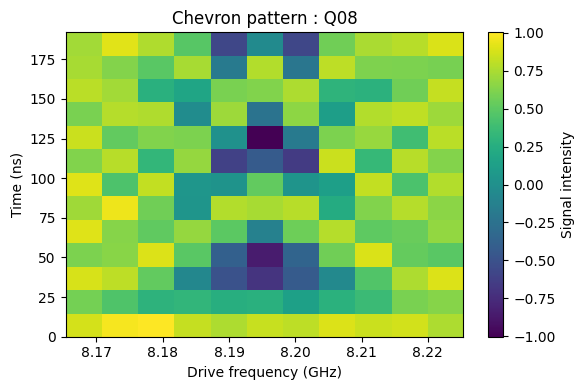

In [12]:
# シェブロンパターン測定

DEVICE = "anemone"
PROGRAM = "chevron_pattern"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

# グラフ描画
p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)
